# Square root of NOT

## $NOT$ (or $X$) operation

The qubit $NOT$ or $X$ operation is a Pauli operation defined as the transformation applied to a qubit state vector by following matrix. It is also known as the $\sigma_x$ operation.

$$X = \begin{bmatrix}
   0 & 1 \\
   1 & 0
\end{bmatrix}$$

We can create it in Qiskit like so:

In [19]:
from qiskit.quantum_info import Operator

X = Operator([[0, 1], [1, 0]])

Applying this to state vectors works in the same way as described in the Operations section of the [States, Measurement and Operations](states-measurements-operations.ipynb) tutorial.

In [20]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

# Define common state vectors.
ket_zero = Statevector([1, 0])                          # |0⟩
ket_one = Statevector([0, 1])                           # |1⟩
ket_plus = Statevector([1 / sqrt(2), 1 / sqrt(2)])      # |+⟩
ket_minus = Statevector([1 / sqrt(2), - 1 / sqrt(2)])   # |-⟩

X_ket_zero = ket_zero.evolve(X)                         # |0⟩ becomes |1⟩
X_ket_one = ket_one.evolve(X)                           # |1⟩ becomes |0⟩
X_ket_plus = ket_plus.evolve(X)                         # |+⟩ stays as |+⟩
X_ket_minus = ket_minus.evolve(X)                       # |-⟩ becomes -|-⟩

display(X_ket_zero.draw('latex'))
display(X_ket_one.draw('latex'))
display(X_ket_plus.draw('latex'))
display(X_ket_minus.draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

The results are therefore as follows, treating each state vector as an input $\ket{\psi}$:

| $\ket{\psi}$ | $\bold{X(\ket{\psi})}$ |
|-----------|-----------|
| $\ket{0}$ | $\ket{1}$ |
| $\ket{1}$ | $\ket{0}$ |
| $\ket{+}$ | $\ket{+}$ |
| $\ket{-}$ | $-\ket{-}$ |

## Hadamard operation

The [Hadamard operation][H] (or gate), $H$, is defined by the matrix:

$$H = \frac{1}{\sqrt{2}}\begin{bmatrix}
   1 & 1 \\
   1 & -1
\end{bmatrix}$$

$$ = \begin{bmatrix}
   \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\
   \frac{1}{\sqrt{2}} & \frac{-1}{\sqrt{2}}
\end{bmatrix}$$

It performs a rotation of π of the state vector around the axis $(\hat{x}+\hat{z})/\sqrt{2}$ at the [Bloch sphere].

This is again easily implemented in Qiskit:

[H]: https://en.wikipedia.org/wiki/Quantum_logic_gate#Hadamard_gate
[Bloch sphere]: https://en.wikipedia.org/wiki/Bloch_sphere

In [21]:
H = 1/sqrt(2) * Operator([[1, 1], [1, -1]])
display(H.draw('latex'))

<IPython.core.display.Latex object>

If we apply $H$ to the state vectors defined previously, we get the outputs in the table below.

| $\ket{\psi}$ | $\bold{H(\ket{\psi})}$ |
|-----------|-----------|
| $\ket{0}$ | $\ket{+}$ |
| $\ket{1}$ | $\ket{-}$ |
| $\ket{+}$ | $\ket{0}$ |
| $\ket{-}$ | $-\ket{1}$ |

## $S$ operation

The S operation (or gate), $S$, is a [phase shift gate](https://en.wikipedia.org/wiki/Quantum_logic_gate#Phase_shift_gates) with a phase shift of $\pi/2$. It therefore has the following matrix:

$$S = \begin{bmatrix}
   1 & 0 \\
   0 & i
\end{bmatrix}$$

In [22]:
S = Operator([[1, 0], [0, 1.0j]])
display(S.draw('latex'))

<IPython.core.display.Latex object>

If we apply $S$ to the state vectors defined previously, we get the outputs in the table below.

| $\ket{\psi}$ | $\bold{S(\ket{\psi})}$ |
|-----------|-----------|
| $\ket{0}$ | $\ket{0}$ |
| $\ket{1}$ | $\ket{1}$ |
| $\ket{+}$ | $\frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ i \end{pmatrix}$ |
| $\ket{-}$ | $\frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ -i \end{pmatrix}$ |

## $HSH$ operation

If we apply an $H$ operation, then an $S$, then another $H$, we get an operation that is defined as the matrix multiplication $HSH$. This is also known as the "square root of $NOT$", as will shortly become clear. The $HSH$ operation has the following matrix:

$$ HSH = \begin{bmatrix} % H
   \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\\\
   \frac{1}{\sqrt{2}} & \frac{-1}{\sqrt{2}}
\end{bmatrix}

% S
\begin{bmatrix}
   1 & 0 \\\\
   0 & i
\end{bmatrix}

% H
\begin{bmatrix}
   \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\\\
   \frac{1}{\sqrt{2}} & \frac{-1}{\sqrt{2}}
\end{bmatrix}

% First result
= \begin{bmatrix}
   \frac{1 + i}{2} & \frac{1 - i}{2} \\\\
   \frac{1 - i}{2} & \frac{1 + i}{2}
\end{bmatrix}
$$

<!-- Take out a factor of 1/2 -->
$$ = \frac{1}{2}\begin{bmatrix}
   1 + i & 1 - i \\\\
   1 - i & 1 + i
\end{bmatrix}
$$

In [41]:
from numpy import matmul

print('S:')
display(S.draw('latex'))

print('H:')
display(H.draw('latex'))

# Use the data attribute to get each Operator's numpy matrix.
SH = Operator(matmul(S.data, H.data))
print('SH:')
display(SH.draw('latex'))

HSH = Operator(matmul(H.data, SH))
print('HSH:')
display(HSH.draw('latex'))

S:


<IPython.core.display.Latex object>

H:


<IPython.core.display.Latex object>

SH:


<IPython.core.display.Latex object>

HSH:


<IPython.core.display.Latex object>

We could alternatively program the $HSH$ operation by adding gates to a Qiskit `QuantumCircuit`:

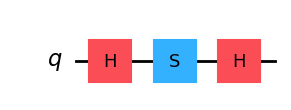

In [ ]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)  # 1 specifies that we are using a single qubit.

# In the commands below, 0 specifies that we want to use the first available qubit (which in this case is also the only available one).
circuit.h(0)
circuit.s(0)
circuit.h(0)

display(circuit.draw(output="mpl"))  # mpl specifies that we want to use Qiskit's matplotlib renderer.

## $(HSH)^2$ operation
If we square the $HSH$ operation found previously, to give $(HSH)^2$, we get the $NOT$ operation:

$$ (HSH)^2 = \Biggl( \frac{1}{2}\begin{bmatrix}
    1 + i & 1 - i \\\\
    1 - i & 1 + i
\end{bmatrix} \Biggr)^2$$

$$ = \frac{1}{4} \begin{bmatrix}
    1 + i & 1 - i \\
    1 - i & 1 + i
\end{bmatrix}^2 $$

$$ = \frac{1}{4} \begin{bmatrix}
    1 + i & 1 - i \\
    1 - i & 1 + i
\end{bmatrix}\begin{bmatrix}
    1 + i & 1 - i \\
    1 - i & 1 + i
\end{bmatrix} $$

$$ = \frac{1}{4} \begin{bmatrix}
    2i - 2i & 4 \\
    4 & -2i + 2i
\end{bmatrix} $$

$$ = \begin{bmatrix}
    0 & 1 \\
    1 & 0
\end{bmatrix} $$

$$ \therefore (HSH)^2 = NOT $$

This is why $HSH$ is referred to as the "square root of $NOT$" operation.

We can show also this result by running $HSH$ and $(HSH)^2$ on the common state vectors defined previously.

<!-- TODO add HSH and (HSH)^2 code examples and output table -->

In [47]:
print('HSH:')
display(HSH.draw('latex'))

HSH_squared = Operator(matmul(HSH, HSH))
print('HSH squared:')
display(HSH_squared.draw('latex'))

HSH:


<IPython.core.display.Latex object>

HSH squared:


<IPython.core.display.Latex object>